In [126]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [19]:
df_netflix = pd.read_csv('.\df_netflix.csv')

In [20]:
df_netflix.head(5)
                

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55


### Visualizando Irformações do DataFrame

In [21]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   As of                 7100 non-null   object
 1   Rank                  7100 non-null   int64 
 2   Year to Date Rank     7100 non-null   object
 3   Last Week Rank        7100 non-null   object
 4   Title                 7100 non-null   object
 5   Type                  7100 non-null   object
 6   Netflix Exclusive     4599 non-null   object
 7   Netflix Release Date  7100 non-null   object
 8   Days In Top 10        7100 non-null   int64 
 9   Viewership Score      7100 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 554.8+ KB


- Tamanho da Base de Dados: 7100 Linhas e 10 Colunas
- Tipo de Dados:  7 object e 3 int 

## Descobrindo Periodo de Análise

In [25]:
inicio = pd.to_datetime(df_netflix['As of']).dt.date.min()
final = pd.to_datetime(df_netflix['As of']).dt.date.max()
print(f'Inicio: {inicio}\nFinal: {final}')

Inicio: 2020-04-01
Final: 2022-03-11


## Verificando dados Nulos

In [28]:
df_netflix.isna().sum()

As of                      0
Rank                       0
Year to Date Rank          0
Last Week Rank             0
Title                      0
Type                       0
Netflix Exclusive       2501
Netflix Release Date       0
Days In Top 10             0
Viewership Score           0
dtype: int64

### Identificando valores nulos

In [29]:
df_netflix['Netflix Exclusive'].value_counts()

Netflix Exclusive
Yes    4599
Name: count, dtype: int64

## Verificando Outliers

In [30]:
df_netflix.describe()

,Rank,Days In Top 10,Viewership Score
count,7100.000000,7100.000000,7100.000000
mean,5.500000,24.123662,122.790141
std,2.872484,58.473789,213.861642
min,1.000000,1.000000,1.000000
25%,3.000000,3.000000,19.000000
50%,5.500000,7.000000,50.000000
75%,8.000000,18.000000,128.000000
max,10.000000,428.000000,1474.000000


Rank                   Axes(0.125,0.11;0.227941x0.77)
Days In Top 10      Axes(0.398529,0.11;0.227941x0.77)
Viewership Score    Axes(0.672059,0.11;0.227941x0.77)
dtype: object

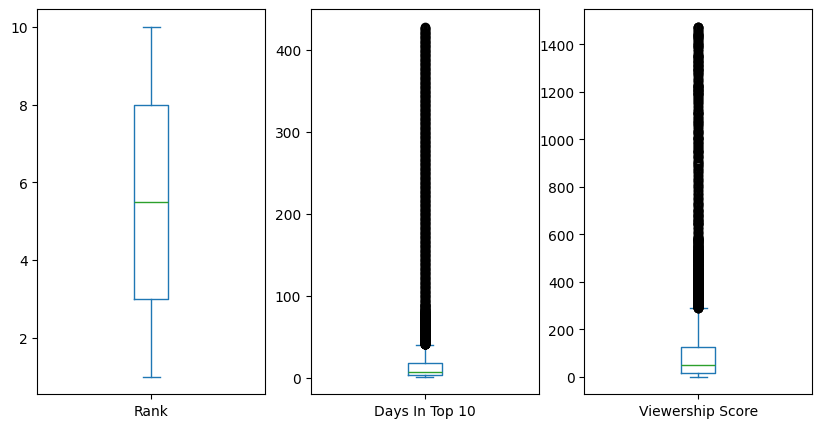

In [49]:
df_netflix.plot.box(figsize=(10,5), subplots=True)

## Analisando Outliers

- Descobrindo Limites Superior "Days in top 10"

In [62]:
q1_netflix_daytop10 = df_netflix['Days In Top 10'].quantile(0.25)
q3_netflix_daytop10 = df_netflix['Days In Top 10'].quantile(0.75)
iqr_netflix_daytop10 = q3_netflix_daytop10 - q1_netflix_daytop10
iqr_netflix_daytop10

15.0

In [63]:
limSup_netflix_daytop10 = q3_netflix_daytop10 + (iqr_netflix_daytop10 * 1.5)
limSup_netflix_daytop10

40.5

- Descobrindo quantidade de Outliers em "Days in top 10"

In [72]:
df_netflix_daytop10 = df_netflix['Days In Top 10']
df_netflix_daytop10[(df_netflix_daytop10 > limSup_netflix_daytop10)].value_counts().sum()

743

- Descobrindo Limites Superior "Viewership Score"

In [73]:
q1_netflix_viewershipscore = df_netflix['Viewership Score'].quantile(0.25)
q3_netflix_viewershipscore = df_netflix['Viewership Score'].quantile(0.75)
iqr_netflix_viewershipscore = q3_netflix_viewershipscore - q1_netflix_viewershipscore
iqr_netflix_viewershipscore

109.0

In [74]:
limSup_netflix_viewershipscore = q3_netflix_viewershipscore + (iqr_netflix_viewershipscore * 1.5)
limSup_netflix_viewershipscore

291.5

- Descobrindo quantidade de Outliers em "Viewership Score"

In [76]:
df_netflix_viewershipscore = df_netflix['Viewership Score']
df_netflix_viewershipscore[(df_netflix_viewershipscore > limSup_netflix_viewershipscore)].value_counts().sum()

698

- Analisando todos os dados Outliers descobrimos uma quantidade de 743 em Days in top 10 e 698 em Viewership Score

### Entendendo Melhor os Outliers 

In [85]:
df_outliers_netflix = df_netflix[(df_netflix['Days In Top 10'] > limSup_netflix_daytop10)]

In [155]:
df_outliers_netflix

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
438,2020-05-14,9,9,-,Ozark,TV Show,Yes,"Jul 21, 2017",41,256
447,2020-05-15,8,9,10,Ozark,TV Show,Yes,"Jul 21, 2017",42,259
458,2020-05-16,9,8,-,Ozark,TV Show,Yes,"Jul 21, 2017",43,261
489,2020-05-19,10,-,7,Ozark,TV Show,Yes,"Jul 21, 2017",44,262
629,2020-06-02,10,-,-,Outer Banks,TV Show,Yes,"Apr 15, 2020",41,291
...,...,...,...,...,...,...,...,...,...,...
7053,2022-03-07,4,3,4,Love is Blind,TV Show,Yes,"Feb 13, 2020",42,288
7063,2022-03-08,4,4,4,Love is Blind,TV Show,Yes,"Feb 13, 2020",43,295
7074,2022-03-09,5,4,5,Love is Blind,TV Show,Yes,"Feb 13, 2020",44,301
7085,2022-03-10,6,5,5,Love is Blind,TV Show,Yes,"Feb 13, 2020",45,306


In [92]:
df_outliers_netflix['Netflix Exclusive'].isna().sum()

516

In [110]:
print('Medidas de Posição dos Outliers de Days In Top 10')
print('Média:', round(df_outliers_netflix['Days In Top 10'].mean(), 2))
print('Mediana:', round(df_outliers_netflix['Days In Top 10'].median(), 2))
print('Moda:', round(df_outliers_netflix['Days In Top 10'].mode(), 2))

Medidas de Posição dos Outliers de Days In Top 10
Média: 148.76
Mediana: 77.0
Moda: 0    41
Name: Days In Top 10, dtype: int64


In [111]:
print('Medidas de Posição dos Outliers de Viewership Score')
print('Média:', round(df_outliers_netflix['Viewership Score'].mean(), 2))
print('Mediana:', round(df_outliers_netflix['Viewership Score'].median(), 2))
print('Moda:', round(df_outliers_netflix['Viewership Score'].mode(), 2))

Medidas de Posição dos Outliers de Viewership Score
Média: 606.21
Mediana: 452.0
Moda: 0    304
1    323
2    332
3    383
4    391
Name: Viewership Score, dtype: int64


In [150]:
# Verificando Title Outliers
df_outliers_netflix.Title.value_counts()

Title
Cocomelon               388
Ozark                    49
Cobra Kai                41
Manifest                 40
The Queenâs Gambit     33
Outer Banks              32
Squid Game               26
All American             26
Bridgerton               18
Lucifer                  17
Virgin River             15
Maid                      9
Emily in Paris            8
Too Hot to Handle         7
Love is Blind             6
The Witcher               5
Sweet Magnolias           5
Ginny & Georgia           4
Tiger King                4
The Queen of Flow         4
Who Killed Sara?          2
Shameless                 2
iCarly                    2
Name: count, dtype: int64

In [156]:
import sweetviz as sv
sv_outliers_netflix_report = sv.analyze(df_outliers_netflix, target_feat='Days In Top 10')

c:\Users\HP\.virtualenvs\eda-ouUDtDO2\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Feature: Title                               |█████▍    | [ 55%]   00:02 -> (00:02 left)c:\Users\HP\.virtualenvs\eda-ouUDtDO2\Lib\site-packages\sweetviz\graph.py:33: UserWarning: Glyph 128 (\x80) missing from font(s) Roboto.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
c:\Users\HP\.virtualenvs\eda-ouUDtDO2\Lib\site-packages\sweetviz\graph.py:33: UserWarning: Glyph 153 (\x99) missing from font(s) Roboto.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)



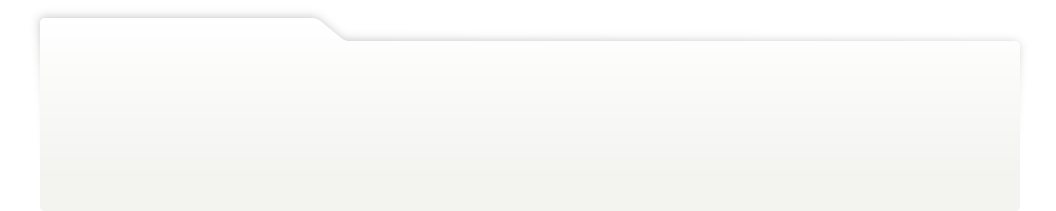
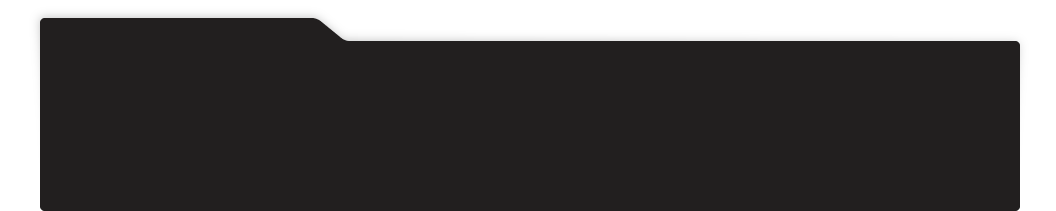
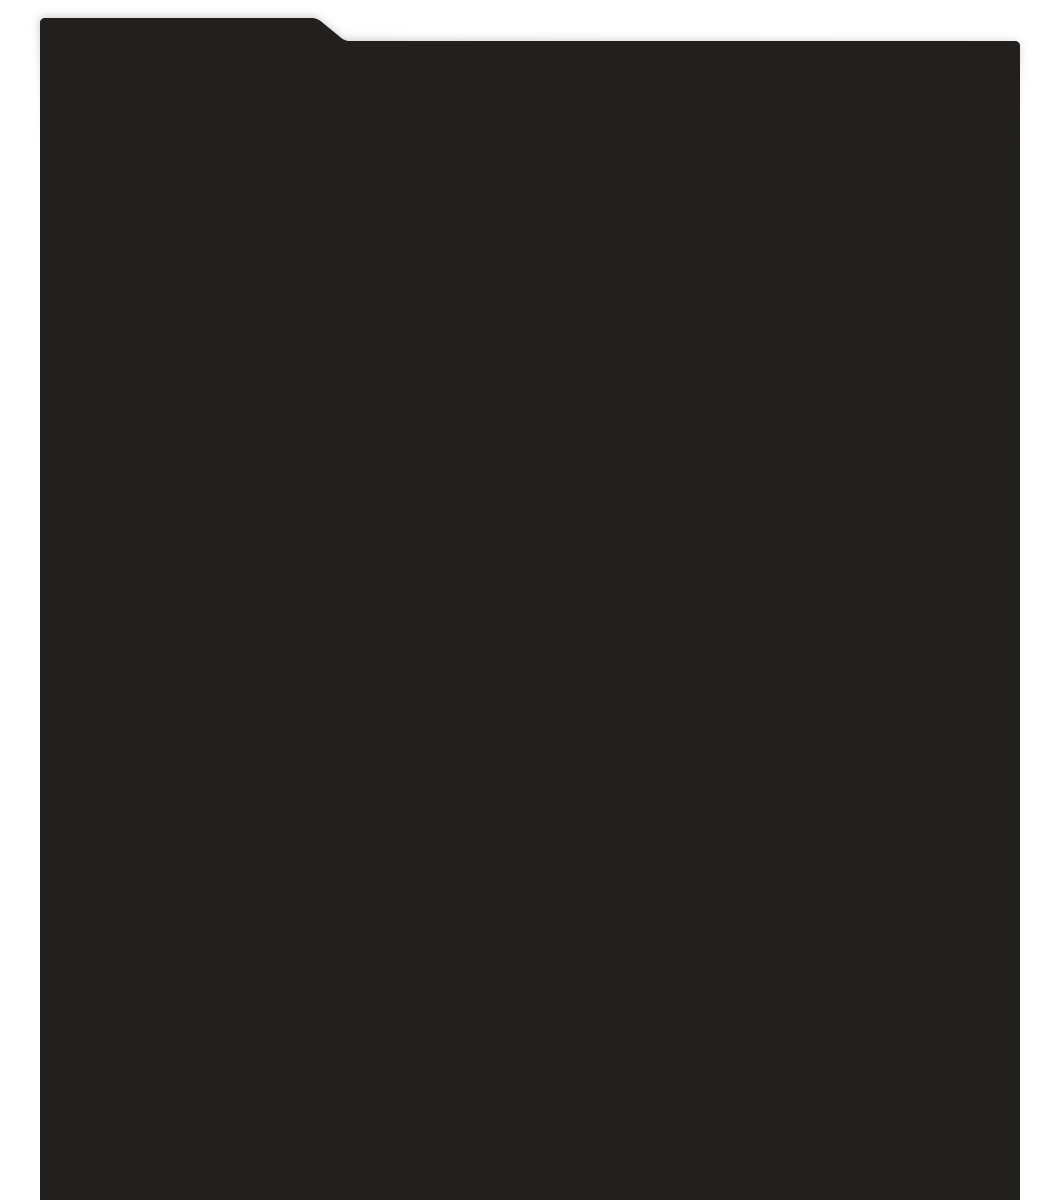
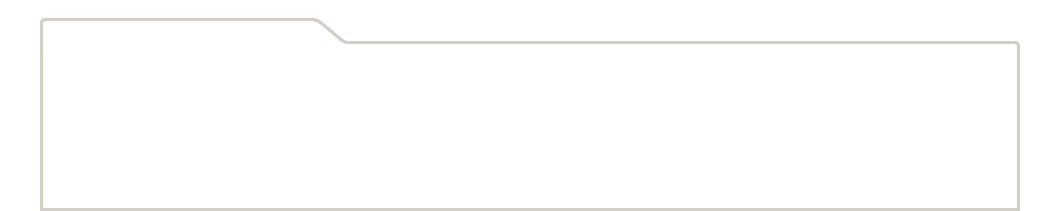
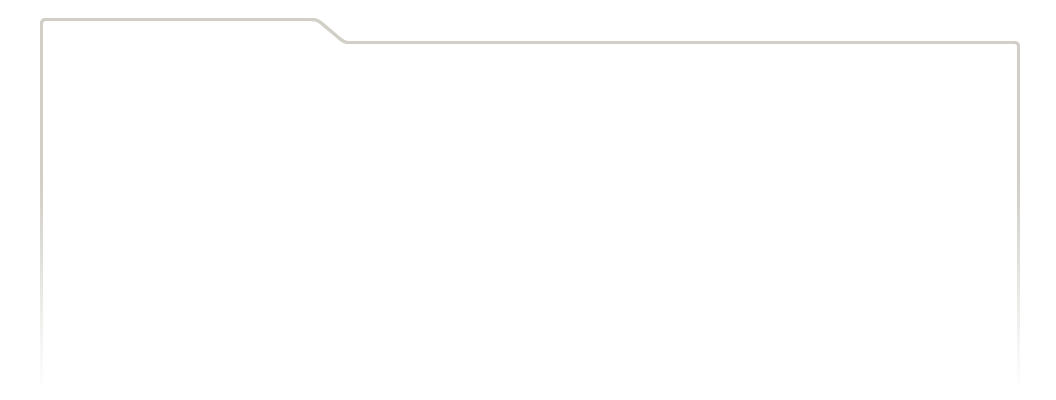
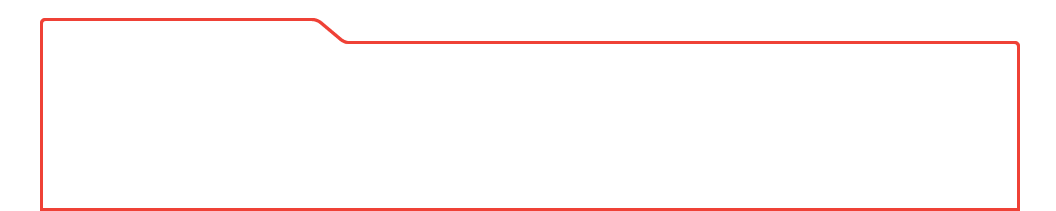
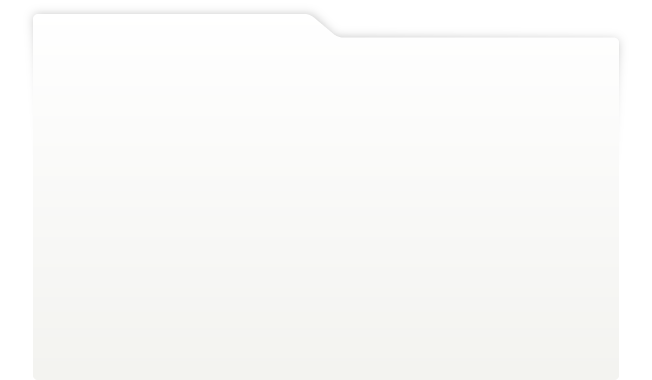
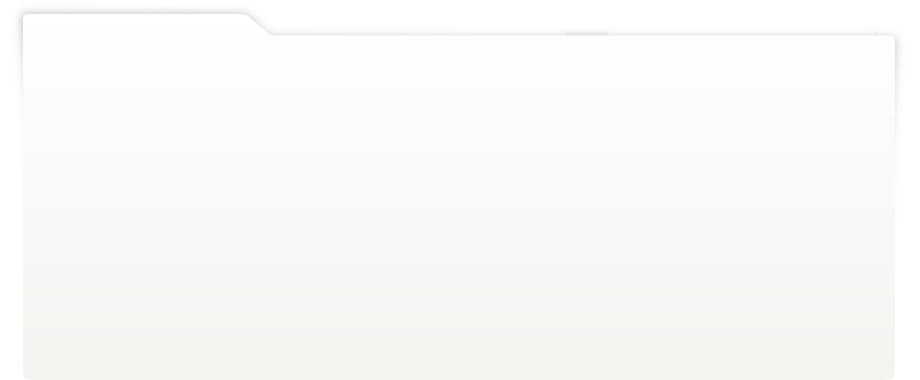
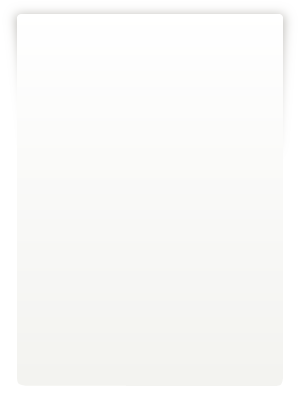
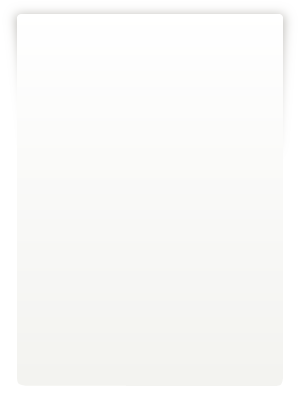
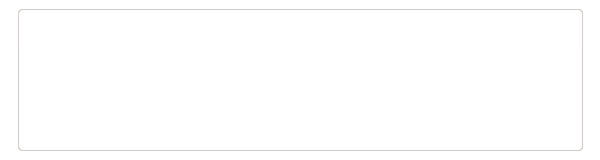
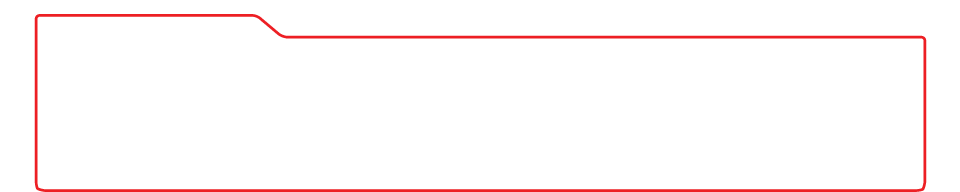
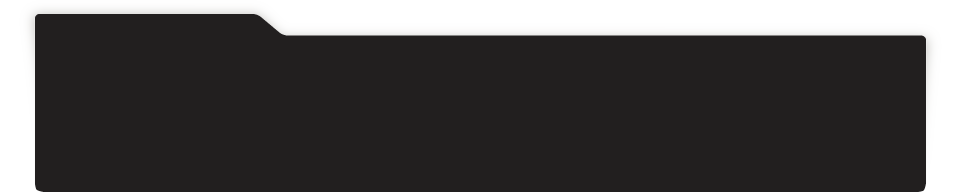
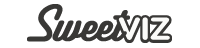
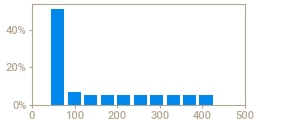
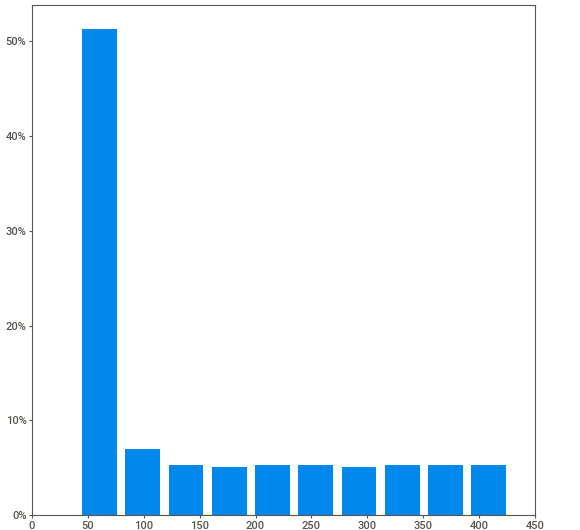
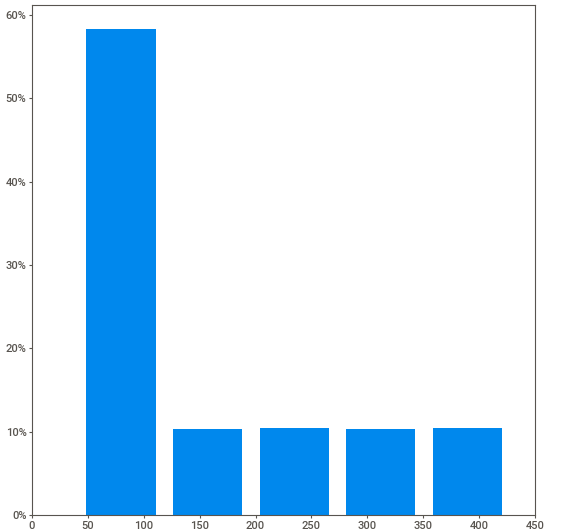
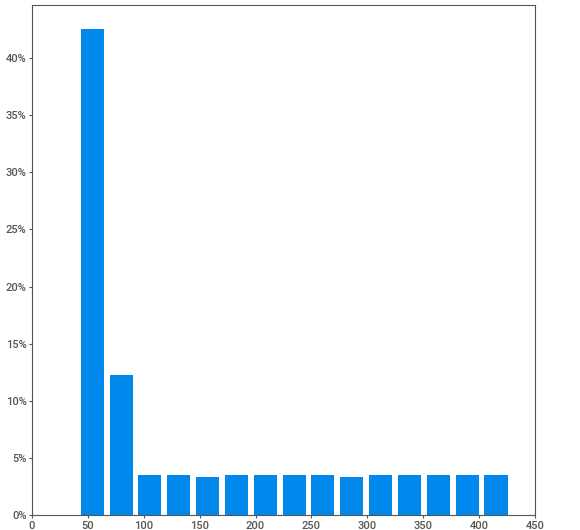
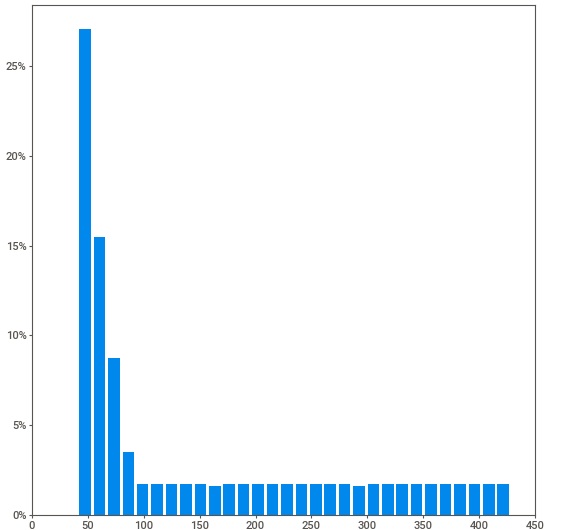
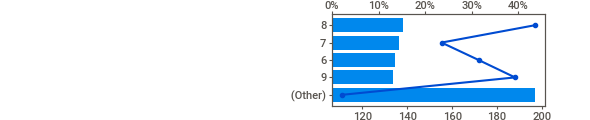
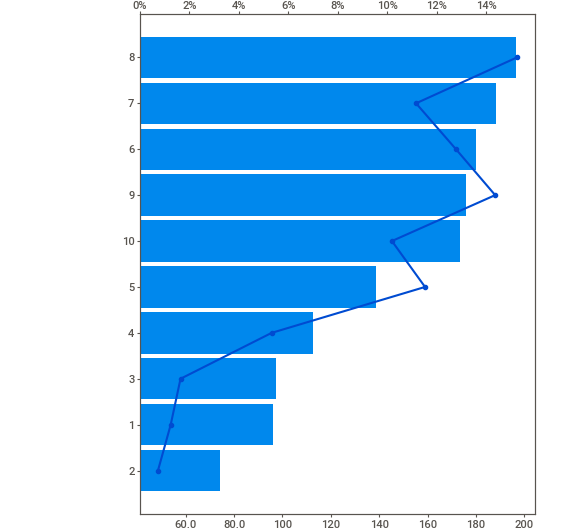
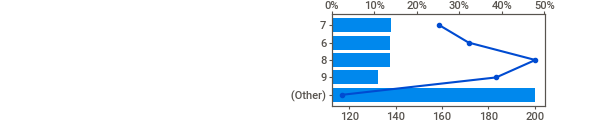
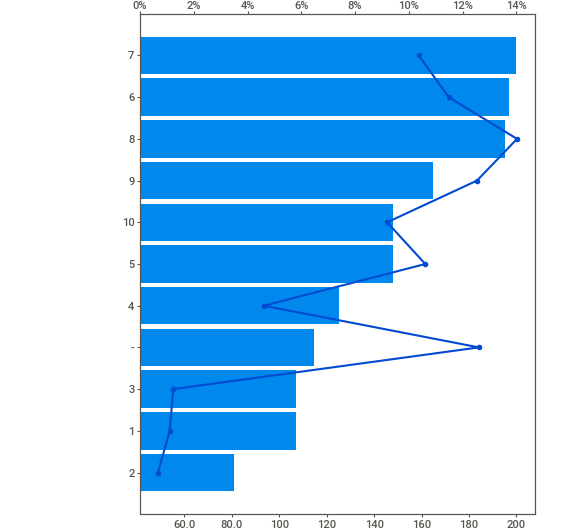
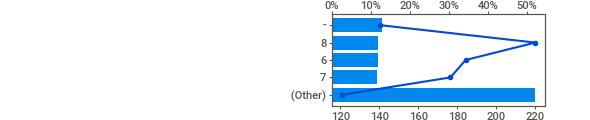
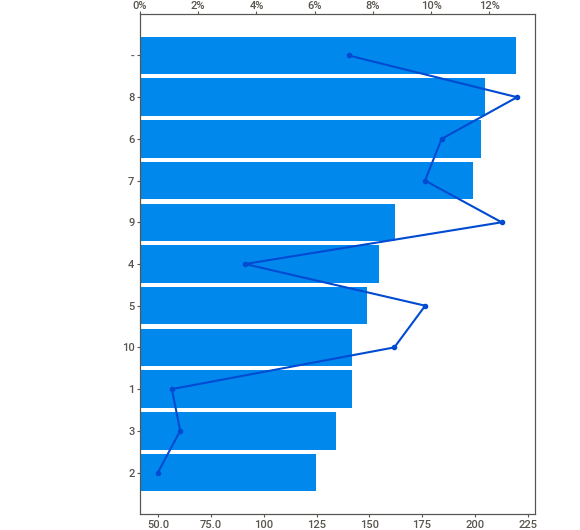
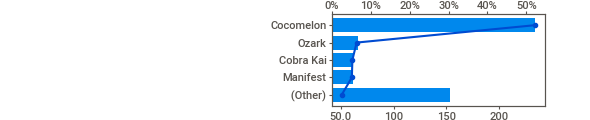
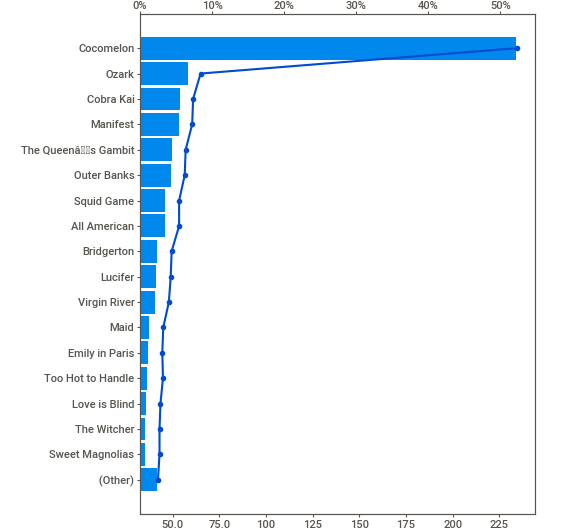
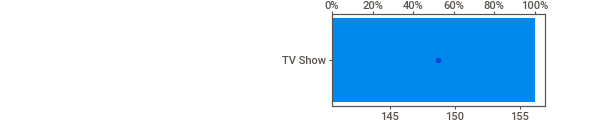
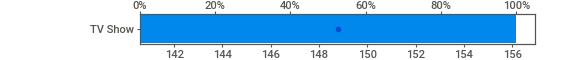
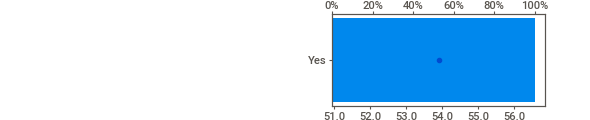
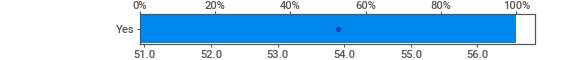
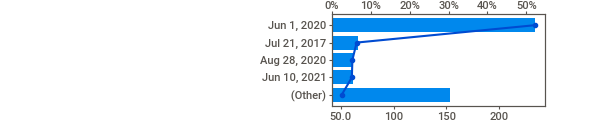
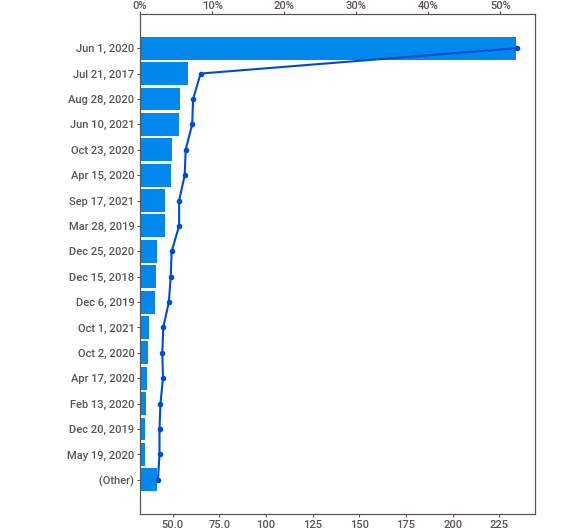
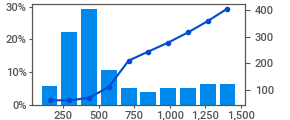
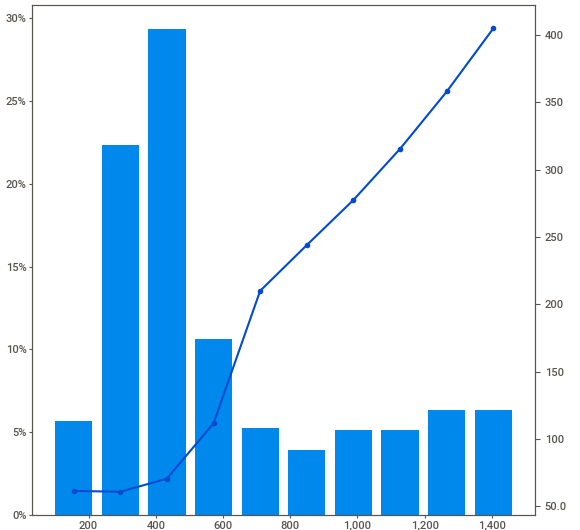
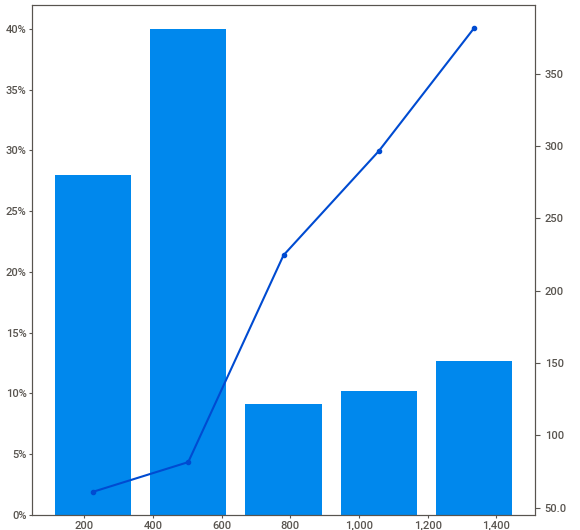
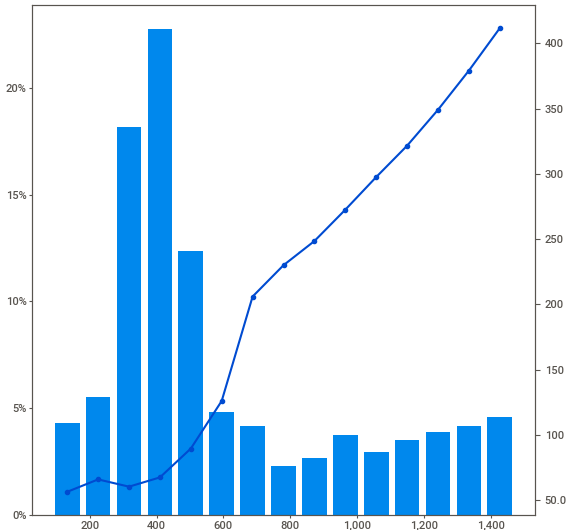
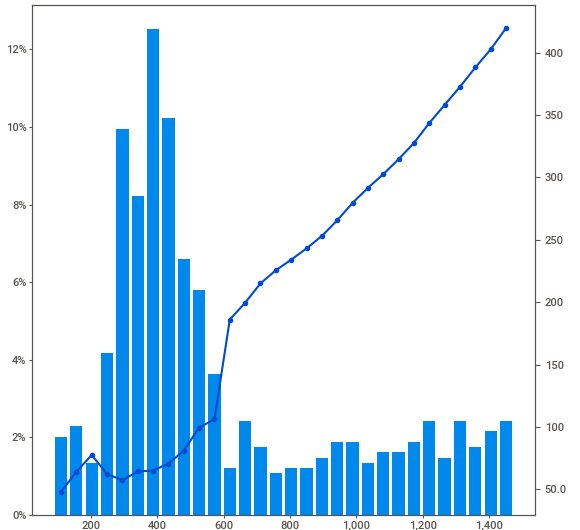
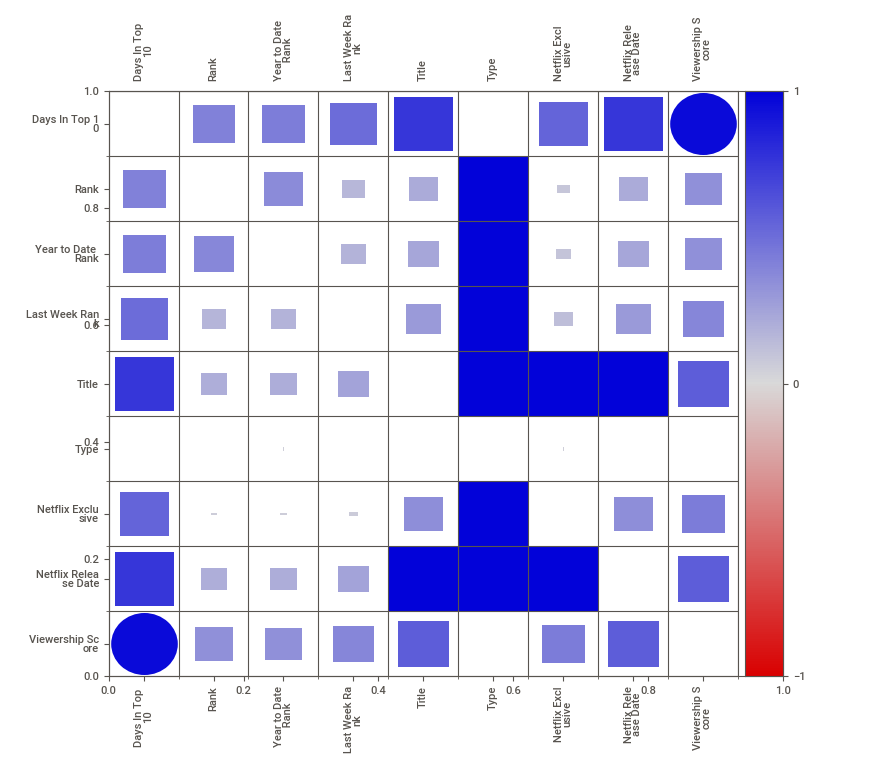
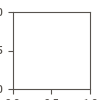

In [157]:
sv_outliers_netflix_report.show_notebook()